# <font color=blue>Assignments for "Understanding The Relationship"</font>

To close out this lesson, you're going to do three assignments. For the first assignment, you'll write up a short answer to a question in a Gist file.  For the second two assignments, you'll do your work in Jupyter notebooks, and you should link to those notebooks in the same Gist file.

Please submit a single Gist file containing the answer to first assignment, plus links for second two.

## 1. Interpretion and signficance

Suppose that we would like to know how much families in the US are spending on recreation annually. We estimated the following model:

$$ expenditure = 873 + 0.0012annual\_income + 0.00002annual\_income^2 - 223.57have\_kids $$

*expenditure* is the annual spending on recreation in US dollars, *annual_income* is the annual income in US dollars and *have_kids* is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer and save in a Gist. 

***We can't understand model exactly by looking only coefficients. Other features should be given that might affect target value. If some of
<Br>
these variables are equal each other our target values predict the same or different values according to have_kids feature but it might not be
<Br>
true. Coefficient values might have no effect on target value according to situation.***

## 2. Weather model

In this exercise, you'll work with the historical temperature data from the previous lesson. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

- First, load the dataset from the **weatherinszeged** table from Kaggle.
- Build a linear regression model where your target variable is the difference between the *apparenttemperature* and the *temperature*. As explanatory variables, use *humidity* and *windspeed*. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables? 
- Next, include the interaction of *humidity* and *windspeed* to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for *humidity* and *windspeed* change? Interpret the estimated coefficients.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
import warnings

warnings.filterwarnings("ignore")

In [2]:
weather = pd.read_csv(r"C:\Users\Kleerys\Desktop\Career\1.1-Python\1.1-DataSets\weatherHistory.csv")

In [3]:
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
weather.drop(weather[weather["Precip Type"].isnull() == True].index, axis = 0, inplace = True)
weather.reset_index(drop = True, inplace = True)

In [5]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
linear = LinearRegression()

In [8]:
y = weather["Temperature (C)"] - weather["Apparent Temperature (C)"]
X = weather.drop("Temperature (C)", axis = 1)

In [9]:
y

0        2.083333
1        2.127778
2        0.000000
3        2.344444
4        1.777778
           ...   
95931    0.000000
95932    0.000000
95933    0.000000
95934    0.000000
95935    0.000000
Length: 95936, dtype: float64

In [10]:
X.head()

,Formatted Date,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [11]:
for col in X.columns:
    if type(X[col].iloc[5]) == str:
        X.drop(col, axis = 1, inplace = True)

In [12]:
X.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [13]:
X_alt = X[["Humidity", "Wind Speed (km/h)"]]

In [14]:
X_alt.head()

,Humidity,Wind Speed (km/h)
0,0.89,14.1197
1,0.86,14.2646
2,0.89,3.9284
3,0.83,14.1036
4,0.83,11.0446


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_alt, y, test_size = 0.2, random_state = 52)

In [16]:
linear.fit(X_train, y_train)

LinearRegression()

In [17]:
y_testPred = linear.predict(X_test)

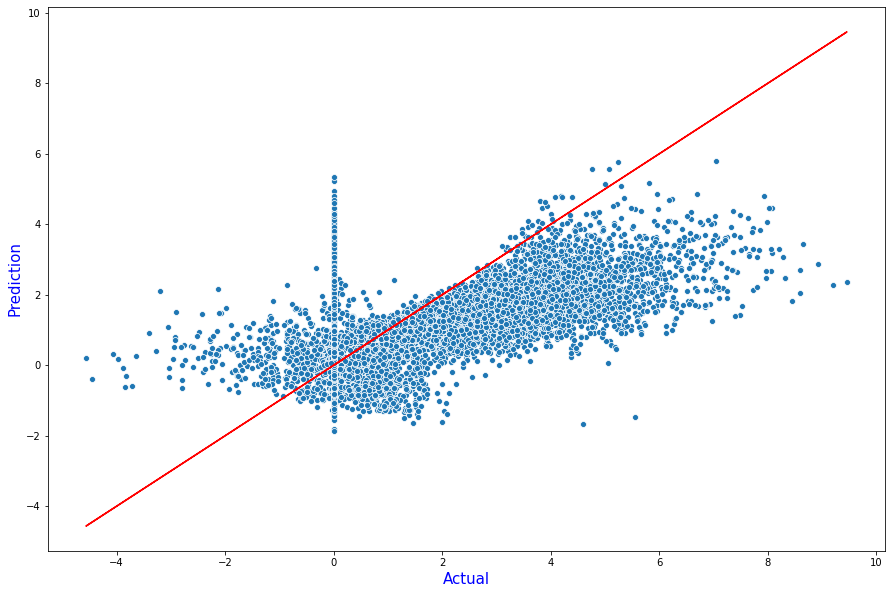

In [18]:
plt.figure(figsize = (15,10))
sns.scatterplot(y_test, y_testPred)
plt.plot(y_test, y_test, color = "red")
plt.xlabel("Actual", size = 15, color = "Blue")
plt.ylabel("Prediction", size = 15, color = "Blue")
plt.show()

In [19]:
import statsmodels.api as sm

In [20]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                 1.560e+04
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:22:31   Log-Likelihood:            -1.3552e+05
No. Observations:               76748   AIC:                         2.710e+05
Df Residuals:                   76745   BIC:                         2.711e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4335      0.023   -103.602      0.000      -2.480      -2.387
Humidity              3.0176      0.027    112.758      0.000       2.965       3.070
Wind Speed (km/h)     0.1195      0.001    157.802      0.000       0.118       0.121
==============================================================================
Omnibus:                     3080.054   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3611.324
Skew:                           0.472   Prob(JB):                         0.00
Kurtosis:                       3.487   Cond. No.                         87.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [22]:
linear.fit(X_train, y_train)

LinearRegression()

In [23]:
y_testPred = linear.predict(X_test)

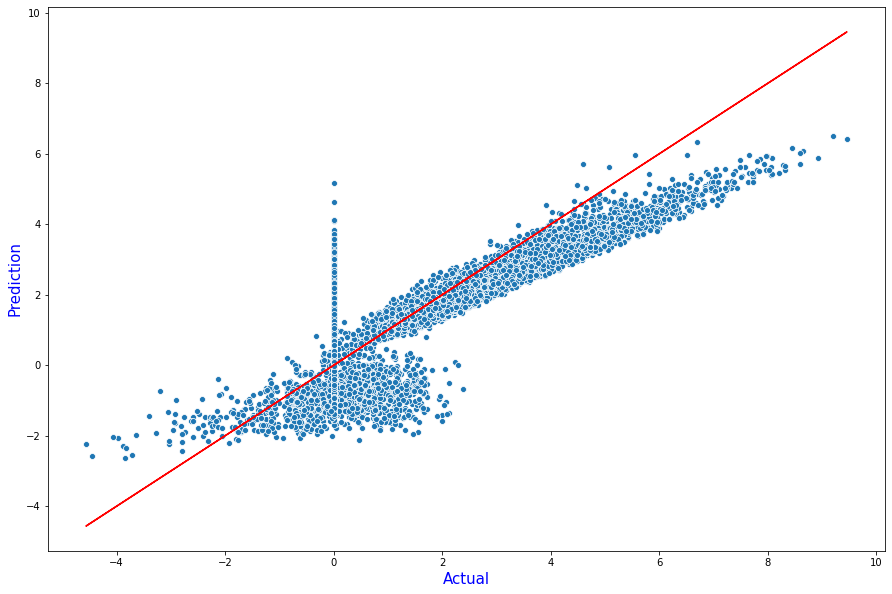

In [24]:
plt.figure(figsize = (15,10))
sns.scatterplot(y_test, y_testPred)
plt.plot(y_test, y_test, color = "red")
plt.xlabel("Actual", size = 15, color = "Blue")
plt.ylabel("Prediction", size = 15, color = "Blue")
plt.show()

In [25]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 2.712e+04
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:22:32   Log-Likelihood:            -1.0494e+05
No. Observations:               76748   AIC:                         2.099e+05
Df Residuals:                   76741   BIC:                         2.100e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.8324      0.038     73.604      0.000       2.757       2.908
Apparent Temperature (C)    -0.1269      0.000   -298.300      0.000      -0.128      -0.126
Humidity                    -1.4096      0.024    -59.878      0.000      -1.456      -1.364
Wind Speed (km/h)            0.0806      0.001    151.974      0.000       0.080       0.082
Wind Bearing (degrees)      -0.0004   3.22e-05    -13.194      0.000      -0.000      -0.000
Visibility (km)              0.0084      0.001      9.225      0.000       0.007       0.010
Loud Cover                        0          0        nan        nan           0           0
Pressure (millibars)        -0.0002    2.9e-05     -7.553      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     2993.670   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3614.239
Skew:                          -0.449   Prob(JB):                         0.00
Kurtosis:                       3.569   Cond. No.                     3.00e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.01e-39. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##  3. House prices model

In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle.
- Run your house prices model again and interpret the results. Which features are statistically significant and which are not?
- Now, exclude the insignificant features from your model. Did anything change?
- Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have more prominent effect on the house prices?
- Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [26]:
house = pd.read_csv(r"C:\Users\Kleerys\Desktop\Career\1.1-Python\1.1-DataSets\houseprice.csv")

In [27]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
a = pd.DataFrame()
for col in house.columns:
    if (house[col].isnull().sum() >= 100):
        a = pd.concat([a, house[col]], axis = 1, names = [col])
display(a)
print(a.info())

,LotFrontage,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,65.0,NaN,NaN,NaN,NaN,NaN
1,80.0,NaN,TA,NaN,NaN,NaN
2,68.0,NaN,TA,NaN,NaN,NaN
3,60.0,NaN,Gd,NaN,NaN,NaN
4,84.0,NaN,TA,NaN,NaN,NaN
...,...,...,...,...,...,...
1455,62.0,NaN,TA,NaN,NaN,NaN
1456,85.0,NaN,TA,NaN,MnPrv,NaN
1457,66.0,NaN,Gd,NaN,GdPrv,Shed
1458,68.0,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   Alley        91 non-null     object 
 2   FireplaceQu  770 non-null    object 
 3   PoolQC       7 non-null      object 
 4   Fence        281 non-null    object 
 5   MiscFeature  54 non-null     object 
dtypes: float64(1), object(5)
memory usage: 79.8+ KB
None


In [29]:
for col in a.columns:
    print(a[col].unique())

[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
[nan 'Grvl' 'Pave']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[nan 'Ex' 'Fa' 'Gd']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [30]:
for col in house.columns:
    if col not in a.columns:
        house.drop(house[house[col].isnull()].index, inplace = True)
        house.reset_index(drop = True, inplace = True)
        a.drop(house[house[col].isnull()].index, inplace = True)
        a.reset_index(drop = True, inplace = True)

In [31]:
for col in house.columns:
    if house[col].isnull().sum() != 0:
        print("*****")
        print("{} feature has {} null values.".format(col, house[col].isnull().sum()))
print("*-*-*-*-*-*")
print("The features that has no null-values are not displayed.")

*****
LotFrontage feature has 244 null values.
*****
Alley feature has 1257 null values.
*****
FireplaceQu feature has 591 null values.
*****
PoolQC feature has 1331 null values.
*****
Fence feature has 1077 null values.
*****
MiscFeature feature has 1289 null values.
*-*-*-*-*-*
The features that has no null-values are not displayed.


In [32]:
print("Filling Lot Frontage By Feature's Mean")
mean = np.mean(house.LotFrontage.dropna())
for index in house.index:
    if np.isnan(house.LotFrontage.iloc[index]):
        house.LotFrontage.iloc[index] = mean
print("Done! Check!")
print("{} column has {} null values.".format("LotFrontage", house.LotFrontage.isnull().sum()))

Filling Lot Frontage By Feature's Mean
Done! Check!
LotFrontage column has 0 null values.


In [33]:
import scipy.stats as scis

In [34]:
def drop (target):
    z = scis.zscore(house["SalePrice"])
    limit = 4 * np.std(house["SalePrice"]) + np.mean(house["SalePrice"])
    house.drop(house[house["SalePrice"] >= limit].index, axis = 0, inplace = True)
    house.reset_index(drop = True, inplace = True)
    return house

In [35]:
z = scis.zscore(house["SalePrice"])
while (len(np.where(z > 4)[0]) != 0):
    z = scis.zscore(house["SalePrice"])
    house = drop(house["SalePrice"])
    print("*****")
    print("Threshold value: {}".format(4))
    print("Numbers of outliers: {}".format(len(np.where(z > 4)[0])))

*****
Threshold value: 4
Numbers of outliers: 8
*****
Threshold value: 4
Numbers of outliers: 3
*****
Threshold value: 4
Numbers of outliers: 1
*****
Threshold value: 4
Numbers of outliers: 0


In [36]:
y = house["SalePrice"]
X = house.drop("SalePrice", axis = 1)

In [37]:
for col in X.columns:
    try:
        np.mean(X[col])
    except:
        X.drop(col, axis = 1, inplace = True)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [40]:
linear = LinearRegression()

In [41]:
linear.fit(X_train, y_train)

LinearRegression()

In [42]:
import statsmodels.api as sm

In [43]:
X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     122.6
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:22:33   Log-Likelihood:                -12448.
No. Observations:                1060   AIC:                         2.497e+04
Df Residuals:                    1024   BIC:                         2.515e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.455e+05   1.49e+06     -0.098      0.922   -3.06e+06    2.77e+06
Id               -3.7868      2.296     -1.649      0.099      -8.292       0.718
MSSubClass     -173.1588     29.295     -5.911      0.000    -230.643    -115.675
LotFrontage    -128.3314     52.622     -2.439      0.015    -231.590     -25.073
LotArea           0.2609      0.127      2.055      0.040       0.012       0.510
OverallQual    1.816e+04   1258.770     14.425      0.000    1.57e+04    2.06e+04
OverallCond    5138.5410   1159.601      4.431      0.000    2863.074    7414.007
YearBuilt       457.1694     82.621      5.533      0.000     295.044     619.295
YearRemodAdd    245.7391     76.797      3.200      0.001      95.041     396.437
MasVnrArea       20.9063      6.528      3.202      0.001       8.096      33.717
BsmtFinSF1        6.1357      2.703      2.270      0.023       0.832      11.440
BsmtFinSF2       -0.7058      4.582     -0.154      0.878      -9.696       8.285
BsmtUnfSF        -1.7180      2.768     -0.621      0.535      -7.150       3.714
TotalBsmtSF       3.7118      4.698      0.790      0.430      -5.507      12.931
1stFlrSF         13.9502      7.818      1.784      0.075      -1.391      29.291
2ndFlrSF         15.5664      6.733      2.312      0.021       2.355      28.778
LowQualFinSF     -9.0862     18.465     -0.492      0.623     -45.319      27.147
GrLivArea        20.4304      7.007      2.916      0.004       6.681      34.179
BsmtFullBath    1.04e+04   2792.144      3.725      0.000    4922.938    1.59e+04
BsmtHalfBath   -849.9688   4315.681     -0.197      0.844   -9318.557    7618.620
FullBath         70.3054   3073.771      0.023      0.982   -5961.305    6101.916
HalfBath      -4576.9825   2873.270     -1.593      0.111   -1.02e+04    1061.186
BedroomAbvGr  -4695.2206   1874.651     -2.505      0.012   -8373.817   -1016.624
KitchenAbvGr  -1.841e+04   6755.820     -2.725      0.007   -3.17e+04   -5153.034
TotRmsAbvGrd   4598.3850   1352.801      3.399      0.001    1943.806    7252.964
Fireplaces     6939.1793   1898.156      3.656      0.000    3214.460    1.07e+04
GarageYrBlt    -201.4130     83.857     -2.402      0.016    -365.963     -36.863
GarageCars     1.649e+04   3069.934      5.373      0.000    1.05e+04    2.25e+04
GarageArea       15.5613     10.608      1.467      0.143      -5.255      36.377
WoodDeckSF       28.6244      8.322      3.440      0.001      12.294      44.955
OpenPorchSF      17.5321     15.993      1.096      0.273     -13.851      48.916
EnclosedPorch    23.7673     17.978      1.322      0.186     -11.511      59.046
3SsnPorch        56.3509     33.548      1.680      0.093      -9.480     122.182
ScreenPorch      42.1153     17.422      2.417      0.016       7.928      76.302
PoolArea        -78.6857     22.939     -3.430   

In [44]:
y_testPred = linear.predict(X_test)

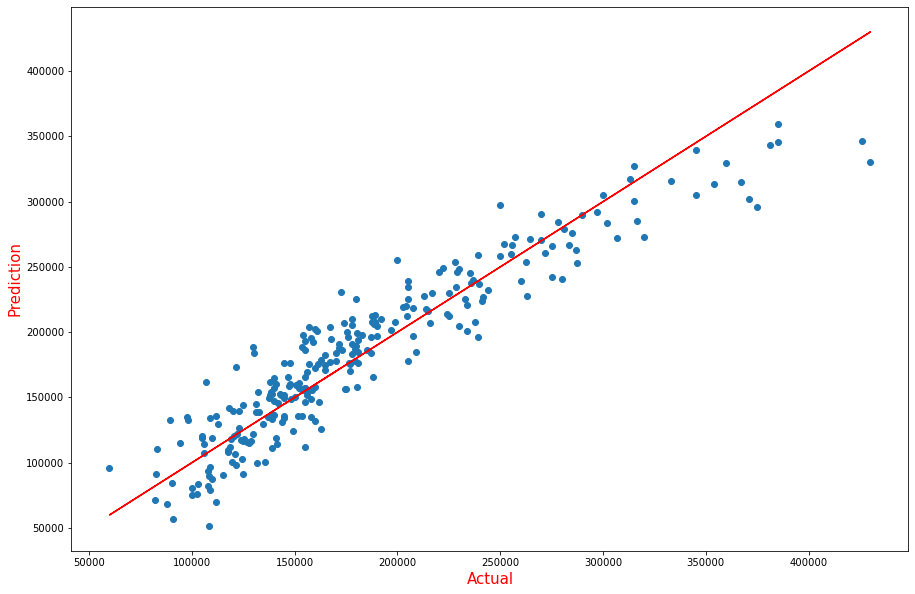

In [45]:
plt.figure(figsize = (15,10))
plt.scatter(x = y_test, y = y_testPred)
plt.plot(y_test, y_test, color = "red")
plt.xlabel("Actual", color = "red", size = (15))
plt.ylabel("Prediction", color = "red", size = (15))
plt.show()

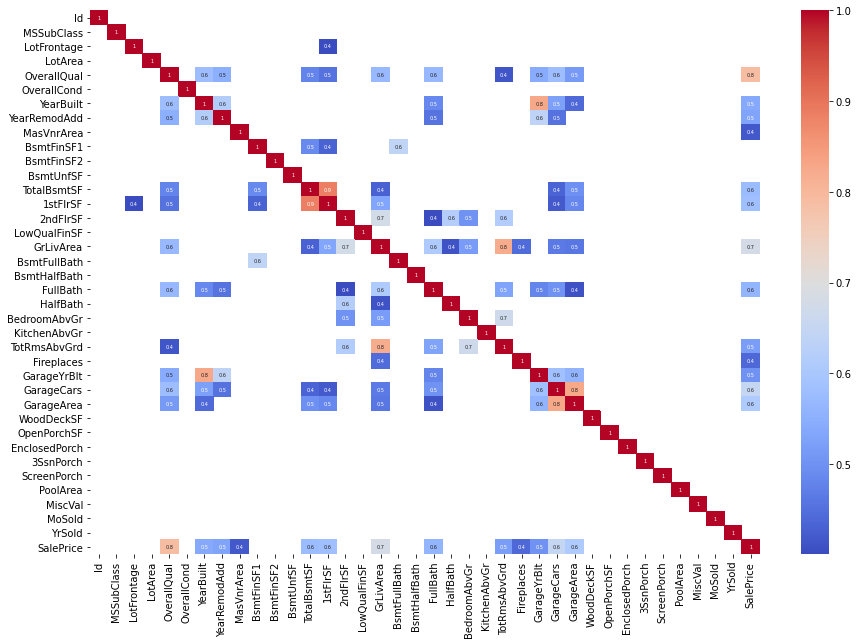

In [46]:
mask = house.corr() < 0.4
plt.figure(figsize = (15,10))
sns.heatmap(house.corr(), cmap = "coolwarm", annot = True, fmt = ".0g", annot_kws = {"size":5}, mask = mask)
plt.show()

In [47]:
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components = 15)
X_pca = pca.fit_transform(X)

In [50]:
X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, y, test_size = 0.2, random_state = 52)

In [51]:
linear.fit(X_pcatrain, y_pcatrain)

LinearRegression()

In [52]:
y_pcatestPred = linear.predict(X_pcatest)

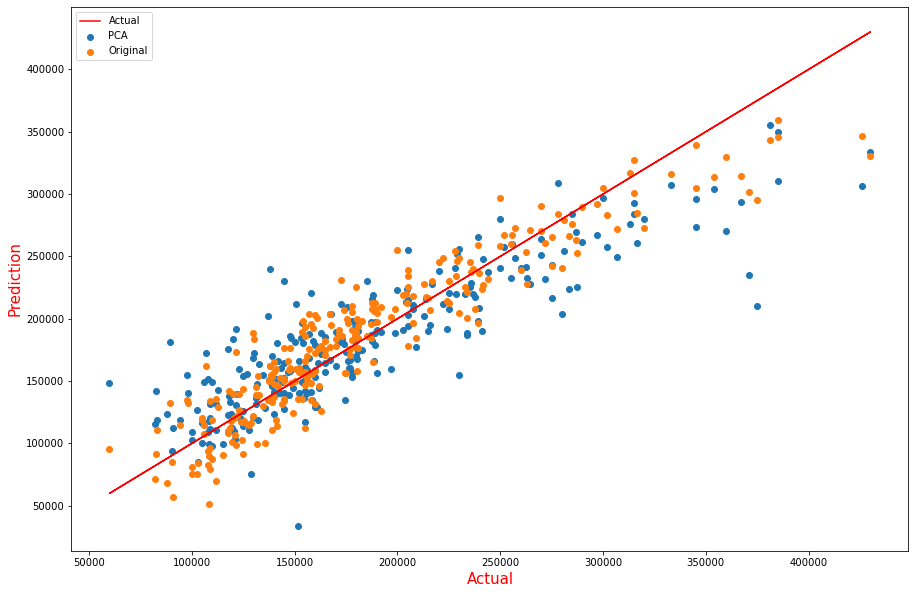

In [57]:
plt.figure(figsize = (15,10))
plt.scatter(x = y_test, y = y_pcatestPred)
plt.scatter(x = y_test, y = y_testPred)
plt.plot(y_test, y_test, color = "red")
plt.legend(["Actual", "PCA", "Original"])
plt.xlabel("Actual", color = "red", size = (15))
plt.ylabel("Prediction", color = "red", size = (15))
plt.show()

In [54]:
X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     122.6
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:22:34   Log-Likelihood:                -12448.
No. Observations:                1060   AIC:                         2.497e+04
Df Residuals:                    1024   BIC:                         2.515e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.455e+05   1.49e+06     -0.098      0.922   -3.06e+06    2.77e+06
Id               -3.7868      2.296     -1.649      0.099      -8.292       0.718
MSSubClass     -173.1588     29.295     -5.911      0.000    -230.643    -115.675
LotFrontage    -128.3314     52.622     -2.439      0.015    -231.590     -25.073
LotArea           0.2609      0.127      2.055      0.040       0.012       0.510
OverallQual    1.816e+04   1258.770     14.425      0.000    1.57e+04    2.06e+04
OverallCond    5138.5410   1159.601      4.431      0.000    2863.074    7414.007
YearBuilt       457.1694     82.621      5.533      0.000     295.044     619.295
YearRemodAdd    245.7391     76.797      3.200      0.001      95.041     396.437
MasVnrArea       20.9063      6.528      3.202      0.001       8.096      33.717
BsmtFinSF1        6.1357      2.703      2.270      0.023       0.832      11.440
BsmtFinSF2       -0.7058      4.582     -0.154      0.878      -9.696       8.285
BsmtUnfSF        -1.7180      2.768     -0.621      0.535      -7.150       3.714
TotalBsmtSF       3.7118      4.698      0.790      0.430      -5.507      12.931
1stFlrSF         13.9502      7.818      1.784      0.075      -1.391      29.291
2ndFlrSF         15.5664      6.733      2.312      0.021       2.355      28.778
LowQualFinSF     -9.0862     18.465     -0.492      0.623     -45.319      27.147
GrLivArea        20.4304      7.007      2.916      0.004       6.681      34.179
BsmtFullBath    1.04e+04   2792.144      3.725      0.000    4922.938    1.59e+04
BsmtHalfBath   -849.9688   4315.681     -0.197      0.844   -9318.557    7618.620
FullBath         70.3054   3073.771      0.023      0.982   -5961.305    6101.916
HalfBath      -4576.9825   2873.270     -1.593      0.111   -1.02e+04    1061.186
BedroomAbvGr  -4695.2206   1874.651     -2.505      0.012   -8373.817   -1016.624
KitchenAbvGr  -1.841e+04   6755.820     -2.725      0.007   -3.17e+04   -5153.034
TotRmsAbvGrd   4598.3850   1352.801      3.399      0.001    1943.806    7252.964
Fireplaces     6939.1793   1898.156      3.656      0.000    3214.460    1.07e+04
GarageYrBlt    -201.4130     83.857     -2.402      0.016    -365.963     -36.863
GarageCars     1.649e+04   3069.934      5.373      0.000    1.05e+04    2.25e+04
GarageArea       15.5613     10.608      1.467      0.143      -5.255      36.377
WoodDeckSF       28.6244      8.322      3.440      0.001      12.294      44.955
OpenPorchSF      17.5321     15.993      1.096      0.273     -13.851      48.916
EnclosedPorch    23.7673     17.978      1.322      0.186     -11.511      59.046
3SsnPorch        56.3509     33.548      1.680      0.093      -9.480     122.182
ScreenPorch      42.1153     17.422      2.417      0.016       7.928      76.302
PoolArea        -78.6857     22.939     -3.430   

***When decrease the feature number by using PCA, model's success is decreasing.***